# Built-in Dataset

-   파이토치는 분야별 공개 데이터셋을 종류별로 torchvision, torchtext, torchaudio 모듈을 통해 제공한다.
-   모든 built-in dataset은 [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)의 하위클래스로 구현되있다.
    -   [computer vision dataset](https://pytorch.org/vision/stable/datasets.html)
    -   [audio dataset](https://pytorch.org/audio/stable/datasets.html)
    -   [text dataset](https://pytorch.org/text/stable/datasets.html)


## Image Built-in dataset Loading

torchvision 모듈을 통해 다양한 오픈소스 이미지 데이터셋을 loading할 수 있는 Dataset 클래스를 제공한다.

-   각 Dataset 클래스의 주요 매개변수 (클래스들 마다 약간의 차이가 있다.)
    -   **root**: str
        -   Raw data를 저장할 디렉토리 경로
    -   **train**: bool
        -   True일경우 Train set을 False일 경우 Test set을 load
    -   **download**: bool
        -   True이면 root에 지정된 경로에 raw 데이터를 인터셋에서 download할지 여부. 이미 저장되 있는 경우 download하지 않는다.
    -   **transform**: function
        -   Loading한 이미지를 변환하는 function.
            -   Normalization이나 data Agumentation 처리를 한다.


In [65]:
import torch
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

In [66]:
mnist_data_dir = "datasets"
mnist_trainset = datasets.MNIST(
    root=mnist_data_dir, # raw data의 위치.
    download=True,       # root에 지정한 경로에 없을 경우 다운받을지 여부
    train=True,          # True: train set, False: test set
)

100.0%
100.0%
100.0%
100.0%


In [ ]:
mnist_trainset

In [ ]:
# Dataset의 총 데이터개수를 조회 - len()
len(mnist_trainset)

In [ ]:
# 개별 데이터를 조회 -> indexing
mnist_trainset[0]  # 개별데이터는 x(input)과 y(output)로 구성되어 tuple(x,  y)로 반환된다.

In [ ]:
# 첫번째 데이터 조회
x0 = mnist_trainset[0]

# 첫번째 데이터 이미지 확인
x0[0]

In [ ]:
# 첫번째 데이터 label 확인
x0[1]

In [ ]:
######################################################################
# Target class 값 조회
######################################################################
# class - class name
## class(class index): 인코딩 된 label의 클래스, class name: 실제 class의 이름.
mnist_trainset.class_to_idx
# dict: key-class name, value: class

In [ ]:
# class name - class
mnist_trainset.classes 
# list: index-class, value-class name


## Dataset의 transform 매개변수를 이용한 데이터 전처리

- Dataset을 생성할 때, **원본 데이터를 제공하기 전 수행할 전처리 과정**을 함수(callable) 형태로 정의한다.
- 이 함수(callable)는 **입력 데이터 하나**를 매개변수로 받아, 전처리된 결과를 반환하도록 구현한다.
- transform 매개변수에는 데이터 파이프라인을 구성하는 함수나 callable 객체를 설정한다.

### torchvision에서 제공하는 주요 transform

- `torchvision.transforms.ToTensor`
  - PIL 이미지(PIL Image)나 넘파이 배열(NumPy ndarray)을 FloatTensor(float32 Tensor)로 변환한다.
  - 이미지 픽셀의 값(intensity)을 \[0., 1.\] 범위로 비례 조정한다.
  - 이미지의 형태(shape)를 (채널, 높이, 너비) 순서로 변경한다.
  - 자세한 내용은 [torchvision transforms 공식 문서](https://pytorch.org/vision/stable/transforms.html) 참고.

- `torchvision.transforms.Normalize`
  - 각 채널별로 지정된 평균(mean)을 빼고, 표준편차(standard deviation)로 나누어 정규화(normalization)를 수행한다.
  - `ToTensor()`로 변환된 데이터를 입력받아 추가 변환을 적용한다.

- `torchvision.transforms.Compose`
  - 여러 변환을 순차적으로 적용하고 싶을 때, `Compose` 클래스를 사용해 변환들을 하나로 묶는다.

In [ ]:
mnist_trainset2 = datasets.MNIST(
    root=mnist_data_dir, 
    download=True,       
    train=True,
    transform=transforms.ToTensor()  # 전처리 callable 전달.
)

In [ ]:
x0_2 = mnist_trainset2[0]

In [ ]:
# ToTensor()의 전처리 작업.
print(x0_2[0].type())  # PIL.Image, np.ndarray -> pytorch Tensor 로 변환
print(x0_2[0].min(), x0_2[0].max()) # 0 ~ 1 사이로 scaling. (MinMaxScaling)
print(x0_2[0].shape) # channel first 로 shape을 변경. (channel, height, width)

In [ ]:
# ToTensor() -> Normalize()
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize(mean=0.5, std=0.5)  # 모든 채널에 동일한 값을 적용: 상수., 채널별로 다른 값 적용: 리스트.
])

mnist_trainset3 = datasets.MNIST(
    root=mnist_data_dir, 
    download=True,       
    train=True,
    transform=transform
)

In [ ]:
mnist_trainset3

### TODO: CIFAR10 Dataset loading
- `datasets.CIFAR10` 이용
-   CIFAR10 Built-in dataset 을 LOADING 후 다음을 확인하시오.
    1. Dataset loading
    1. train dataset, test dataset의 데이터 개수 확인
    1. class index - class name 확인
    1. train set의 이미지 5장을 출력. label의 이름을 title로 출력.


## DataLoader 생성

-   DataLoader
    -   모델이 학습하거나 추론할 때 Dataset의 데이터를 batch size 개수단위로 모아서 모델에 제공한다.
    -   initalizer속성
        -   dataset: 값을 제공하는 Dataset 타입 객체
        -   batch_size: 한번에 값을 제공할 batch 크기
        -   shuffle: 에폭마다 데이터셋을 섞을 지 여부 (default: False)
        -   drop_last: 마지막 배치의 데이터개수가 batch_size 설정보다 적을 경우 제공할 지 여부(False-기본값, 제공한다. True: 제공하지 않는다.)


In [ ]:
from torch.utils.data import DataLoader

mnist_train_loader = DataLoader(mnist_trainset2, batch_size=1000, shuffle=True, drop_last=True)

In [ ]:
# step 수 조회
len(mnist_train_loader)

# Custom Dataset 구현

사용자가 보유한 데이터를 이용하여 커스텀 Dataset을 생성할 수 있다.

## 구현 방법
1. `torch.utils.data.Dataset` 클래스를 상속하는 새로운 클래스를 정의한다.

2. `__init__(self, ...)`
   - Dataset 객체 생성 시 필요한 설정을 초기화한다.
   - 예를 들어, 데이터 저장 경로, transform 설정 여부 등을 초기화한다.

3. `__len__(self)`
   - 전체 데이터의 개수를 반환하도록 구현한다.
   - DataLoader가 배치를 생성할 때 이 정보를 사용한다.

4. `__getitem__(self, index)`
   - index에 해당하는 데이터 포인트를 반환한다.
   - 입력(input, X)과 출력(output, y)을 튜플 형태로 반환한다.
   - transform이 설정되어 있을 경우, 변환된 입력 데이터를 반환한다.


## OxfordPet Dataset 생성

-   https://www.robots.ox.ac.uk/~vgg/data/pets/
-   개,고양이 37가지 품종
-   품종별로 200장 정도씩 구성됨. (품종별로 이미지 개수는 다르다)
-   목표
    -   train: 70%, validation: 20%, test: 10%


In [1]:
import os
import re
from glob import glob
import tarfile # tar 압축파일 다루는 모듈.
from PIL import Image

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

In [2]:
tar_file_path = 'images.tar.gz'  #압축파일 경로
dataset_path = "datasets/oxfordpet" # 압축을 풀 경로
pet_dataset_path = "datasets/oxfordpet/images" # 압축 풀린 이미지가 저장될 경로.

In [3]:
#############################
# tar 압축풀기
#############################
with tarfile.open(tar_file_path) as tar: # 압축파일과 연결(open)
    tar.extractall(dataset_path)         # 압축풀 경로를 넣어서 풀기. 

C:\Users\Playdata\AppData\Local\Temp\ipykernel_25908\608470855.py:5: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(dataset_path)         # 압축풀 경로를 넣어서 풀기.


In [ ]:
##############################
#  이미지 파일들의 경로 조회
##############################
file_list = glob(pet_dataset_path+"/*.jpg") # pet_dataset_path 이 디렉토리 밑에 있는 모든 .jpg에 대한 경로를 지정함
file_list[:5], len(file_list) #7390장의 사진진

(['datasets/oxfordpet/images\\Abyssinian_1.jpg',
  'datasets/oxfordpet/images\\Abyssinian_10.jpg',
  'datasets/oxfordpet/images\\Abyssinian_100.jpg',
  'datasets/oxfordpet/images\\Abyssinian_101.jpg',
  'datasets/oxfordpet/images\\Abyssinian_102.jpg'],
 7390)

In [5]:
##########################################################
#  jpg color(RGB) 이미지만 남기고 나머지 이미지파일들 삭제
##########################################################
remove_cnt = 0 # 몇장 지웠는지 확인용.
for file in file_list:
    # 이미지 연결(open)
    with Image.open(file) as img:
        img_mode = img.mode  # .mode를 붙이면 어떤 색상mode인지 나옴. "RGB": rgb color, 'L': gray scale
    if img_mode != "RGB":
        #RGB 아닌 파일은 삭제. >> (R,G,B) = (x,y,z) 꼴로 구성된것만 남기고 학습해야지, (B,G,R)이나 다른 꼴의 pixel이면 학습이 제대로될리 없다.
        os.remove(file)
        remove_cnt += 1
        print(f"삭제한 파일명: {os.path.basename(file)}")

삭제한 파일명: Abyssinian_34.jpg
삭제한 파일명: Abyssinian_5.jpg
삭제한 파일명: Egyptian_Mau_129.jpg
삭제한 파일명: Egyptian_Mau_139.jpg
삭제한 파일명: Egyptian_Mau_14.jpg
삭제한 파일명: Egyptian_Mau_145.jpg
삭제한 파일명: Egyptian_Mau_167.jpg
삭제한 파일명: Egyptian_Mau_177.jpg
삭제한 파일명: Egyptian_Mau_186.jpg
삭제한 파일명: Egyptian_Mau_191.jpg
삭제한 파일명: staffordshire_bull_terrier_2.jpg
삭제한 파일명: staffordshire_bull_terrier_22.jpg


In [6]:
print("삭제한 이미지 개수:",remove_cnt)

삭제한 이미지 개수: 12


In [7]:
######################################
# 삭제 후후 이미지 파일 경로 목록을 갱신
######################################
file_list = glob(pet_dataset_path+"/*.jpg")
len(file_list)

7378

### index_to_class, class_to_index 생성

-   **index**: class index 번호(0, 1, 2), **class**: class 이름 (dog, cat, ..)
-   **index_to_class**: class들을 가지는 리스트. index(0, 1, ..)로 class 조회
    -   index를 주면 class 이름을 반환
-   **class_to_index**: key: 클래스이름, value: index -> class이름 넣으면 index 반환
    -   class 이름을 주면 index를 반환
-   Oxford PET - 파일명이 class
    -   대문자로 시작: 고양이, 소문자로 시작: 개
    -   파일명: 품종\_번호.jpg


In [8]:
class_name_set = set() # class이름들을 담을 set(중복제거를 위해 set 이용)
                       # >>> 파일 이름 뒤에 숫자와 .jpg 지우고 set에 넣으면 중복 없어지므로 품종명만 남는다. 
for f in file_list:
    file_name = os.path.basename(f)             # 파일경로에서 가장 마지막 경로인 파일명만 조회
    label = re.sub(r"_\d+\.jpg", "", file_name) # 품종만 뽑아내기 >> american_pit_bull_terrier_100.jpg -> _100.jpg 를 제거
                        # 정규표현식. \d > 숫자를 의미  //  + > 1개 이상을 의미  //  \. > .을 의미(그냥 . 은 아무 글자하나)
                        # re.sub(패턴, 패턴을 변경할 문자열, 대상)
    class_name_set.add(label)

In [ ]:
index_to_class = list(class_name_set)
index_to_class.sort()
index_to_class

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [ ]:
# {class name: class index} # >> 품종과 index 확인인
class_to_index = {value : index for index, value in enumerate(index_to_class)}
class_to_index

{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British_Shorthair': 4,
 'Egyptian_Mau': 5,
 'Maine_Coon': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian_Blue': 9,
 'Siamese': 10,
 'Sphynx': 11,
 'american_bulldog': 12,
 'american_pit_bull_terrier': 13,
 'basset_hound': 14,
 'beagle': 15,
 'boxer': 16,
 'chihuahua': 17,
 'english_cocker_spaniel': 18,
 'english_setter': 19,
 'german_shorthaired': 20,
 'great_pyrenees': 21,
 'havanese': 22,
 'japanese_chin': 23,
 'keeshond': 24,
 'leonberger': 25,
 'miniature_pinscher': 26,
 'newfoundland': 27,
 'pomeranian': 28,
 'pug': 29,
 'saint_bernard': 30,
 'samoyed': 31,
 'scottish_terrier': 32,
 'shiba_inu': 33,
 'staffordshire_bull_terrier': 34,
 'wheaten_terrier': 35,
 'yorkshire_terrier': 36}

In [11]:
###############################################################
# Train(70%)/Test(10%)/Validation(20%) dataset 분리
#   class 별로 위의 비율이 되도록 나눈다.
# >>> 단순히 나눠버리면 train에 한쪽 클래스(품종)가 너무 많이 들어가는 문제 생긴다. stratgify를 했던건데, 지금 y값이 없으므로 직접 로직을 짜야한다.
# ############################################################ 

# 클래스(품종) 별로 200 개 개수를 기준으로 7: 1: 2 의 비율로 나눴을 때 나누는 지점의 index를 조회
train_idx = int(200 * 0.7)
valid_idx = train_idx + int(200 * 0.2)
train_idx, valid_idx
# 0 ~ train_idx         : train set
# train_idx ~ valid_idx : valid set
# valid_idx ~           : test set

(140, 180)

In [12]:
train_file_list = [] # 우리는 파일목록만 분류하므로, 목록만을 list로 구성한다.
valid_file_list = []
test_file_list = []

cnt = 0               # class별 몇번째 파일인지를 저장할 변수.
previous_class = None # 이전 반복에서 처리한 파일의 class 이름.
file_list.sort() # >> 품종명별로 정렬. previous_class(앞선품종)과 class_name(현재품종)이 달라지게되면 다른 품종으로 넘어간 것.

for path in file_list:
    file_name = os.path.splitext(os.path.basename(path))[0]  # 확장자를 뺀 파일명 조회 >> 파일명과 확장자를 분리해줌 그중에 0번 인덱스는 파일명.
    class_name = re.sub(r"_\d+", "", file_name)              # 파일명에서 품종 class 추출 >> 확장자는 지웠으니 _숫자 지우기

    if previous_class == class_name: # 이전처리 class와 현재처리 class가 같으면
        cnt += 1 # 동일한 클래스 처리: 처리 count를 1 증가
    else:
        cnt = 0  # 다른 클래스를 처리: 처리 count를 0으로 초기화

    if cnt <= train_idx: # train_file_list에 추가.   0 ~ 140-1
        train_file_list.append(path)
    elif cnt > train_idx and cnt <= valid_idx: # valide_file_list에 추가. 140 ~ 180-1
        valid_file_list.append(path)
    else: # test_file_list에 추가. 180-1 ~ 나머지.
        test_file_list.append(path)
        
    previous_class = class_name

In [13]:
print(train_file_list[0])
print(valid_file_list[0])
print(test_file_list[0])

datasets/oxfordpet/images\Abyssinian_1.jpg
datasets/oxfordpet/images\Abyssinian_44.jpg
datasets/oxfordpet/images\Abyssinian_84.jpg


In [14]:
len(train_file_list), len(valid_file_list), len(test_file_list)

(5217, 1480, 681)

In [15]:
########################################
#  Dataset 클래스 구현
########################################
class OxfordPetDataset(Dataset):

    def __init__(self, file_list, class_to_index, index_to_class, transform=None):
        """
        Args:
            file_list(list) - 데이터셋에 들어갈 파일들의 경로를 가지는 리스트
            class_to_index(dict) - class name로 class index를 조회
            index_to_class(list) - class index로 class name을 조회
            transform(callable) - 반환할 Image(X)를 전처리하는 callable 객체.
        """
        self.file_list = file_list
        self.class_to_index = class_to_index
        self.index_to_class = index_to_class
        self.transform = transform

    def __len__(self):
        """총 데이터 개수"""
        return len(self.file_list)

    def __getitem__(self, index):
        """
        index의 개별 데이터를 반환. input, output 데이터를 묶어서 반환.

        Args:
            index(int) - 조회할 데이터포인트의 index
        
        Returns:
            tuple - (input, output)
        """
        ## input data (x)
        # 반환할 이미지 경로
        img_path = self.file_list[index]

        # 이미지 Loading 후 RGB 컬러모드로 변환.
        img = Image.open(img_path).convert('RGB') 
        
        # Resize (모델 입력 크기에 맞춰준다.) >> 사진의 size를 224x224로 통일하여 feature를 통일시키는 것.
        img = img.resize((224, 224)) # 대부분 전처리기에 넣는다.
        
        if self.transform is not None: #  transform(전처리기)가 있다면 전처리하여 img에 다시 넣음.
            img = self.transform(img)

        ## output (y)
        # 경로에서 파일명만 추출: _번호.jpg 제거.
        class_name = re.sub(r'_\d+\.jpg', "", os.path.basename(img_path))
        # class name을 이용해 class index 조회
        class_index = self.class_to_index[class_name]

        return img, class_index # (X,y) = (image, class의 index)

    def __str__(self):
        return f"[Oxford Pet Dataset]\n총데이터수: {len(self.file_list)}"

In [16]:
train_set = OxfordPetDataset(train_file_list, class_to_index, index_to_class)
len(train_set)

5217

In [32]:
x, y = train_set[200]

1 Bengal


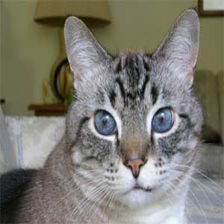

In [33]:
print(y, train_set.index_to_class[y])
x

In [29]:
##############################################
# Dataset 생성
##############################################
train_set2 = OxfordPetDataset(train_file_list, class_to_index, index_to_class, transforms.ToTensor())
valid_set2 = OxfordPetDataset(valid_file_list, class_to_index, index_to_class, transforms.ToTensor())
test_set2 = OxfordPetDataset(test_file_list, class_to_index, index_to_class, transforms.ToTensor())

In [34]:
##############################################
# DataLoader 생성
##############################################
train_loader = DataLoader(train_set2, batch_size=1000, shuffle=True, drop_last=True)
valid_loader = DataLoader(valid_set2, batch_size=1000)
test_loader = DataLoader(test_set2, batch_size=1000)

In [36]:
len(train_set2), len(valid_set2), len(test_set2)

(5217, 1480, 681)

In [37]:
len(train_loader), len(valid_loader), len(test_loader)

(5, 2, 1)

In [ ]:
################################################################################
# 위의 전체 프로세스를 Dataset 에 모두 정의(데이터 로딩, 전처리, Dataset 생성)
################################################################################
import os
import re
from glob import glob
import tarfile
from PIL import Image

from torch.utils.data import Dataset


class OxfordPetDataset2(Dataset):
    
    def __init__(self, root, split, transform=None):
        """
        Args:
            root(str) - 모든 이미지가 저장된 디렉토리
            split(str) - train/valid/test Dataset중 어떤 dataset을 생성할 지.
            transfomr(callable) - 전처리 callable 객체
        """
        self.root = root  # 파일들이 저장된 root 디렉토리.
        self.split = split  # train / valid / test
        self.transform = transform
        # trainset, validation set 구분 기준 index
        self.train_idx = int(200 * 0.7) # trainset 기준 index
        self.val_idx = self.train_idx + int(200*0.2)
        
        # RGB 이미지 빼고 제거 + file_list 생성
        self.file_list = self._remove_not_rgb()
        self.file_list.sort()  
        # index_to_class, class_to_index 생성
        self.index_to_class, self.class_to_index = self._create_class_index()
        # 파일 경로 목록 생성
        self.split_file_list = self._create_split_file_list(split)
   
    def __len__(self):
        return len(self.split_file_list)
        
    def __getitem__(self, index):
        path = self.split_file_list[index]
        # x - input
        img = Image.open(path).convert('RGB') 
        img = img.resize((224, 224)) # Transform에서 처리.
        
        if self.transform is not None:
            img = self.transform(img)       
        # y - output
        class_name = re.sub(r"_\d+\.jpg", "", os.path.basename(path))
        class_index = self.class_to_index[class_name]
        return img, class_index
        
    def __str__(self):
        return f"OxfordPet Dataset\nSplit: {self.split}\n총데이터수: {self.__len__()}"
        
    def _create_split_file_list(self, split):
        """
        split(train/valid/test) 별 파일 경로 list 반환
        Args
            split(str) train/valid/test 
        Returns
            list: 파일 경로 List
        """
        split_file_list = []
        cnt = 0
        previous_class = None
        for path in self.file_list:
            file_name = os.path.splitext(os.path.basename(path))[0]  # 디렉토리 빼고 확장자 빼고 파일명만 추출
            class_name = re.sub(r"_\d+", "", file_name)
            if previous_class == class_name:
                cnt += 1
            else:
                cnt = 1

            if split=="train":  # >>> "train"이라고 적으면 trainset만 만들겠다는 의미. 이하의 vaild와 test도 마찬가지임.
                if cnt <= self.train_idx:
                    split_file_list.append(path)
            elif split=="valid":
                if cnt > self.train_idx and cnt <= self.val_idx:
                    split_file_list.append(path)
            elif split=="test":
                if cnt > self.val_idx:
                    split_file_list.append(path)
            else:
                raise Exception(f"split은 train/valid/test 중 하나를 입력하세요.")
            
            previous_class = class_name
            
        return split_file_list

        
    def _create_class_index(self):
        """
        index: class index, class: class_name
        파일명 label을 이용해 index_to_class 리스트, class_to_index dictionary 생성
        
        Returns
            tuple - index_to_class, class_to_index
        """
        class_name_set = set()  # 빈 set. 여기에 파일명들을 저장. -> 중복 제거를 위해서 set사용.
        for file in self.file_list:
            file_name = os.path.basename(file)       # Beagle_32.jpg
            label = re.sub(r'_\d+.jpg', "", file_name)  # Beagle
            class_name_set.add(label)
        index_to_class = list(class_name_set)
        index_to_class.sort()   # [A, B, C, ..]  # 리스트 index: class index, value: class Name
        class_to_index = {value:index for index, value in enumerate(index_to_class)}
        return index_to_class, class_to_index

    
    def _remove_not_rgb(self):
        """
        데이터파일에서 RGB 를 제외한 이미지 제거
        """
        file_list = glob(os.path.join(self.root, "*.jpg"))
        for file in file_list:
            # 이미지파일과 연결
            with Image.open(file) as img:
                image_mode = img.mode # "RGB", "L": grayscale, 
                
            if image_mode != "RGB": # RGB 가 아닌 파일은 제거
                os.remove(file)
        
        return glob(os.path.join(self.root, "*.jpg"))  # 파일목록 리턴

In [39]:
root = "datasets/oxfordpet/images/"
trainset = OxfordPetDataset2(root, "train")
validset = OxfordPetDataset2(root, "valid")
testset = OxfordPetDataset2(root, "test")

In [42]:
print(trainset)

OxfordPet Dataset
Split: train
총데이터수: 5180


0 Abyssinian


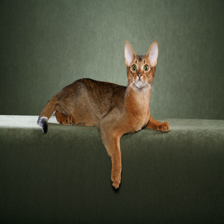

In [41]:
x, y = trainset[0]
print(y, trainset.index_to_class[y])
x

# 메모리상의 Tensor, ndarray 타입의 데이터를 이용해 Dataset생성
이미 tensor나 ndarray의 형태로 메모리에 loading된 데이터셋을 Dataset으로 생성
-   torch.utils.data.TensorDataset 이용
-   parameter
    -   input: Tensor
    -   output: Tensor


In [ ]:
import pandas as pd
iris = pd.read_csv("data/iris.data", 
                   header=None, 
                   names=["sepal length", "sepal width", "petal lenth", "petal width", "label"]) # 헤더없어서 컬럼명 지정.
iris.shape

(150, 5)

In [44]:
iris.head()

,sepal length,sepal width,petal lenth,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
X = iris.drop(columns='label').values
y = iris['label'].values

#.values >> df을 numpy의 ndarray로 바꿔줌줌

In [50]:
# y값을 label encoding
from sklearn.preprocessing import LabelEncoder
y_le = LabelEncoder()
y = y_le.fit_transform(y)
y[:5]

array([0, 0, 0, 0, 0])

In [51]:
# train/test set 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

In [ ]:
from torch.utils.data import TensorDataset
# TensorDataset: tensor를 주면 tensor를 이용한 dataset을 만들어줌. 위에서 ndarray에 대해서 x,y 나누고, __init__하고 __getitem__ 하던걸 다 해줌
# (X, y) : X/y는 Tensor 타입
# tensor로 넣어야하므로 ndarray를 tensor로 만들어 넣는다.
trainset = TensorDataset(
    torch.tensor(X_train), # input
    torch.tensor(y_train), # output
)
testset = TensorDataset(torch.tensor(X_test), torch.tensor(y_test))

In [53]:
trainset[0]

(tensor([4.8000, 3.0000, 1.4000, 0.3000], dtype=torch.float64), tensor(0))

In [54]:
y_le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# 모델 성능 평가를 위한 데이터셋 분리 >> 녹음 시작

-   **Train 데이터셋 (훈련/학습 데이터셋)**
    -   모델을 학습시킬 때 사용할 데이터셋.
-   **Validation 데이터셋 (검증 데이터셋)**
    -   모델의 성능 중간 검증을 위한 데이터셋
-   **Test 데이터셋 (평가 데이터셋)**
    -   모델의 성능을 최종적으로 측정하기 위한 데이터셋
    -   **Test 데이터셋은 마지막에 모델의 성능을 측정하는 용도로 한번만 사용한다.**

## 검증(validation), 평가(test) 데이터셋을 나누는 이유

-   모델을 훈련하고 성능 검증했을 때 원하는 성능이 나오지 않으면 모델의 여러 설정(하이퍼파라미터)들을 수정한 뒤에 다시 훈련시키고 검증을 하게 된다. 그리고 원하는 성능이 나올때 까지 설정변경->훈련->검증을 반복하게 된다. 이 작업이 **모델링(Modeling)** 이다.
-   위 사이클을 반복하게 되면 검증 결과를 바탕으로 설정을 변경하게 되므로 검증 할 때 사용한 데이터셋(Test set)에 모델이 맞춰서 훈련하는 것과 동일한 효과를 내게 된다.(설정을 변경하는 이유가 Test set에 대한 결과를 좋게 만들기 위해 변경하므로) 그래서 Train dataset과 Test dataset 두 개의 데이터셋만 사용하게 되면 **모델의 성능을 제대로 평가할 수 없게 된다.** 그래서 데이터셋을 train set, validation set, test set으로 나눠 train set 와 validation set을 사용해 훈련과 검증을 해 모델을 최적화 한 뒤 마지막에 test set으로 최종 평가를 한다.

> -   **(Parameter)머신러닝 모델 파라미터**
>     -   성능에 영향을 주는 값으로 최적화의야 하는 대상내는 값을 찾아야 한다.
>         -   **하이퍼파라미터(Hyper Parameter)**
>             -   사람이 직접 설정해야하는 파라미터 값으로 주로 어떻게 모델을 학습시킬지에 대한 모델설정 값이다.
>             -   딥러닝에서는 학습률, Epoch수, batch size, optimizer, loss 함수 등 다양한 하이퍼파라미터가 있다.
>         -   **파라미터(Parameter)**
>             -   모델의 함수를 데이터에 맞추기 위한 값으로 학습을 통해 찾는 변수.
>             -   딥러닝 모델에서는 weight와 bias 가 파라미터다.


## Dataset 분리

### torch.utils.data.Subset을 이용

-   Dataset의 일부를 가지는 부분집합 데이터셋을 생성
-   주로 사용하는 곳
    1. 데이터 셋을 분리
    2. 전체 데이터 셋에서 일부 데이터를 추출 할 때
    3. 데이터셋에서 특정 데이터만 골라서 추출할 때 (ex: 특정 class만 추출하는 경우)


In [58]:
import torch
from torch.utils.data import TensorDataset, Subset
# >> sutset(부분집합) : 결국 dataset 나누는건 부분집합을 만드는 것.

In [59]:
# >> 가상의 데이터로 연습해보기

inputs = torch.arange(1, 11).reshape(5, 2) # >> X는 5x2짜리
outputs = torch.arange(5).reshape(5, 1)    # >> y는 5x1짜리
inputs.shape, outputs.shape

(torch.Size([5, 2]), torch.Size([5, 1]))

In [60]:
dataset = TensorDataset(inputs, outputs) # >> TensorDataset을 두개의 subset으로 나누고 싶은 것.
len(dataset)

5

In [72]:
# dataset의 5개중에 3개를 골라서 Subset 생성.
sub1 = Subset(dataset, [1, 2, 4])   # (가져올Dataset, 가져올 index들) >> 인덱스를 직접적으로 주는 것.
sub2 = Subset(dataset, [0, 3])
len(sub1), len(sub2)

(3, 2)

In [62]:
for i in sub1:
    print(i)

(tensor([3, 4]), tensor([1]))
(tensor([5, 6]), tensor([2]))
(tensor([ 9, 10]), tensor([4]))


In [63]:
for i in sub2:
    print(i)

(tensor([1, 2]), tensor([0]))
(tensor([7, 8]), tensor([3]))


In [64]:
inputs

tensor([[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8],
        [ 9, 10]])

In [ ]:
# >> MNIST dataset으로 연습해보자
from torchvision import datasets
trainset = datasets.MNIST("datasets", train=True, download=True)
len(trainset)

60000

In [ ]:
all_index = torch.randperm(len(trainset)) # 0 ~ 지정한정수: 섞어서 반환.
train_index = all_index[:50000]  # ~50000 (50000개) 섞은 후 앞의 5만개.
valid_index = all_index[50000:]  # 50000~ (10000개) 겄은 후 뒤의 1만개.

In [69]:
m_trainset2 = Subset(trainset, train_index)
m_valid2 = Subset(trainset, valid_index)
len(m_trainset2), len(m_valid2)

(50000, 10000)

### random_split() 함수 이용

-   Dataset객체와 나눌 데이터셋들의 원소 개수를 리스트로 묶어서 전달하면 Shuffle후 나눈 뒤 그 결과를 Subset객체들을 리스트에 담아 반환한다.


In [70]:
# >> 위에선 subset 직접 인덱스 넣어가며, 섞으며 나눴다. 이걸 바로 해주는 모듈.
from torch.utils.data import random_split
sub1, sub2, sub3 = random_split(
     trainset, # 나눌대상  Dataset
     [40000, 10000, 10000],
     # [몇개씩으로 나눌지 개수] >> 각각 4만, 1만, 1만으로 나눔. 3개의 subset! 만약, 40000,10000,5000,5000 했으면 4개 만들어졌겠지?
)

In [71]:
len(sub1), len(sub2), len(sub3)

(40000, 10000, 10000)